**DESAFIO FINAL**

> Arq. de Bigdata

# Carregando Bases

In [ ]:
import pandas as pd

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import xlrd

In [ ]:
#Importando base clientes
clientes = pd.read_csv('clientes.csv', sep = ',')

In [ ]:
clientes.head(2)

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes
0,1,1,26,2,3,13,0,1
1,2,1,58,0,2,2,0,0


In [ ]:
#importando base compras
compras = pd.read_excel("compras.xls")
compras.head(1)

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra
0,1,1011.0,3,5.99,17.97


In [ ]:
#importando base estados
estados = pd.read_csv("estados.txt", sep ="|", encoding="latin1")
estados.head(1)

,codigo_estado,nome_estado,sgl_estado
0,1,Acre,AC


In [ ]:
#importando base produtos
produtos = pd.read_html('https://profleandrolessa.wordpress.com/exercicio-de-coleta-de-dados', header = 0) [0]
produtos.head(1)

,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor
0,1000,Sabão em pó,1,Produtos de Limpeza,99


#Pergunta 1:

---


Os dataset disponibilizados sem nenhum tratamento possui algum dado ausente?


In [ ]:
clientes.isna().sum()

cod_cliente     0
sexo            0
idade           0
qtd_filhos      0
estado_civil    0
cod_estado      0
hipertenso      0
diabetes        0
dtype: int64

In [ ]:
compras.isna().sum()

cod_cliente            0
cod_produto           10
qtd_produto            0
valor_unitario         5
valor_total_compra    21
dtype: int64

In [ ]:
estados.isna().sum()

codigo_estado    0
nome_estado      0
sgl_estado       0
dtype: int64

In [ ]:
produtos.isna().sum()

cod_produto           0
nome_produto          0
cod_classe_produto    0
classe_produto        0
valor                 0
dtype: int64

#Tratando valores nulos

In [ ]:
#Verificando colunas com valores nulos
compras.isna().sum()

cod_cliente            0
cod_produto           10
qtd_produto            0
valor_unitario         5
valor_total_compra    21
dtype: int64

In [ ]:
compras.valor_unitario.fillna(compras.valor_total_compra / compras.qtd_produto, inplace= True)

In [ ]:
compras.valor_total_compra.fillna(compras.qtd_produto * compras.valor_unitario, inplace = True)

In [ ]:
compras.dropna(subset=['cod_produto'],inplace = True)

In [ ]:
#Verificando se ainda há valores nulos
compras.isna().sum()

cod_cliente           0
cod_produto           0
qtd_produto           0
valor_unitario        0
valor_total_compra    0
dtype: int64

#Pergunta 2:

---
Qual é o desvio padrão dos valores de produtos do dataset de produtos cuja classe do alimento é bebidas?


*   2,50
*   4,63
*   1,63







In [ ]:
produtos.groupby('classe_produto')['valor'].std().round(4)

classe_produto
Alimentação             267.6091
Bebidas                 210.5991
Carnes e Frios         2292.1717
Hortifruti              206.5819
Produtos de Limpeza     286.8534
Name: valor, dtype: float64

#Pergunta 3:

---
Construa um histograma de distribuição das idades dos clientes do gênero masculino. Gera um gráfico com 20 barras. Qual é o CORRETO?


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
cl_masc = clientes.query("sexo == 1")
cl_masc

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes
0,1,1,26,2,3,13,0,1
1,2,1,58,0,2,2,0,0
2,3,1,63,1,3,11,1,1
3,4,1,58,2,2,11,1,1
6,7,1,31,1,3,16,1,1
...,...,...,...,...,...,...,...,...
2993,2994,1,61,1,1,4,1,1
2995,2996,1,63,1,2,12,0,1
2996,2997,1,35,0,2,7,0,0
2997,2998,1,35,2,0,11,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fa54fc690>]],
      dtype=object)

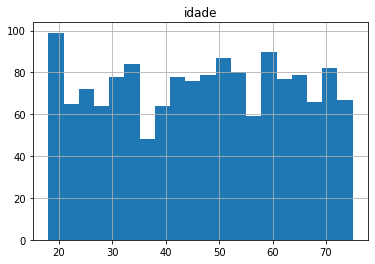

In [ ]:
cl_masc.hist(column = "idade", bins = 20)

#Pergunta 4

---
Crie um novo dataframe a partir  de compras_clientes com as colunas de idade e valor total da compra. Calcule o WCSS para esses dados e responda: Qual o valor de WCSS para o primeiro cluster?



*   3594146
*   332278
*   1665877
*   272074





In [ ]:
#Unificando as bases
clientes_compras = pd.merge(clientes,compras, on = 'cod_cliente').sort_values('cod_cliente')

In [ ]:
#visualizando o nome das colunas
estados.head(1)

,codigo_estado,nome_estado,sgl_estado
0,1,Acre,AC


In [ ]:
#Alterando o nome da coluna 'codigo_estado'
estados.rename(columns = {'codigo_estado':'cod_estado'}, inplace = True)

In [ ]:
clientes_compras_produtos = pd.merge(clientes_compras, produtos, on = "cod_produto")

In [ ]:
base_completa = pd.merge(clientes_compras_produtos, estados, on = 'cod_estado')

In [ ]:
cc = clientes_compras[['idade','valor_total_compra']]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#calculando o valor de WCSS

def calc_wcss(cc):
  wcss = []
  for k in range(1,5):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(X=cc)
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
wcss_cc = calc_wcss(cc)


In [ ]:
type(wcss_cc)

list

In [ ]:
#visualizandos o valor de WCSS
for i in range(len(wcss_cc)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_cc[i]}')

O cluster 0 possui valor de WCSS de: 3594146.3889058544
O cluster 1 possui valor de WCSS de: 1665877.0056578135
O cluster 2 possui valor de WCSS de: 1077628.4135660413
O cluster 3 possui valor de WCSS de: 724846.9305424874


#Pergunta 5:

---
Qual a proporção de homens e mulheres hipertensos que compraram produtos da classe "Alimentação"?



*   50.48 para os homens e 49.52 para as mulheres
*   52,92 para os homens e 48,09 para as mulheres
*   51.05 para os homens e 49,05 para as mulheres
*   48,05 para os homens e 51,95 para as mulheres



In [ ]:
total = base_completa.query("cod_classe_produto == 3 & hipertenso ==1")

In [ ]:
fem = clientes_compras.query("cod_classe_produto == 3 & hipertenso ==1 & sexo == 0")

In [ ]:
masc = clientes_compras.query("cod_classe_produto == 3 & hipertenso ==1 & sexo == 1")

In [ ]:
percMasc = masc.count() / total.count()

In [ ]:
print(percMasc * 100)

cod_cliente           50.479846
sexo                  50.479846
idade                 50.479846
qtd_filhos            50.479846
estado_civil          50.479846
cod_estado            50.479846
hipertenso            50.479846
diabetes              50.479846
cod_produto           50.479846
qtd_produto           50.479846
valor_unitario        50.479846
valor_total_compra    50.479846
nome_produto          50.479846
cod_classe_produto    50.479846
classe_produto        50.479846
valor                 50.479846
nome_estado           50.479846
sgl_estado            50.479846
dtype: float64


In [ ]:
percFem = fem.count() / total.count()

In [ ]:
print(percFem * 100)

cod_cliente           49.520154
sexo                  49.520154
idade                 49.520154
qtd_filhos            49.520154
estado_civil          49.520154
cod_estado            49.520154
hipertenso            49.520154
diabetes              49.520154
cod_produto           49.520154
qtd_produto           49.520154
valor_unitario        49.520154
valor_total_compra    49.520154
nome_produto          49.520154
cod_classe_produto    49.520154
classe_produto        49.520154
valor                 49.520154
nome_estado           49.520154
sgl_estado            49.520154
dtype: float64


#Pergunta 6:

---

Gere o gráfico de análise de clusters com os centroides e selecione a opção que representa a imagem gerada.

In [ ]:
#Importamdo bibliotecas para plotar graficos

import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.offline as py
import plotly.graph_objects as go #Para criação e concatenização de graficos

In [ ]:
grafico_wcss = px.line( x= range(1,5),
                        y=wcss_cc
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss', 
                  template =  'plotly_white'
                  ) 

fig.show()

In [ ]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(cc)

In [ ]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[ 60.91697281,  12.88620132],
       [ 45.3       , 180.42616667],
       [ 32.07195846,  13.7052003 ],
       [ 46.61085973,  73.94230769]])

In [ ]:
grafico = px.scatter(x = clientes_compras['idade'], 
                            y = clientes_compras['valor_total_compra'], 
                            color= clientes_compras['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

#Pergunta 7:

---

Após aplicar o algoritmo de agrupamento, gere uma estatística com describe da variável valor total compra agrupando os resultados por cluster e assinale a alternativa CORRETA.

In [ ]:
compras_clientes.groupby('cluster')['valor_total_compra'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1360.0,13.998213,10.263399,1.25,6.00,11.96,17.9800,50.00
1,54.0,186.031296,38.863936,138.00,140.00,194.97,219.7125,259.96
2,1368.0,13.052661,9.451013,1.25,5.99,11.00,17.6700,48.00
3,208.0,78.078125,24.235610,45.00,56.99,69.00,90.0000,129.98


#Pergunta 8:

---
Assinale a alternativa que apresenta o resultado do diagrama de boxplot entre as variáveis quantidade de filhos e cluster.


In [ ]:
import seaborn as sns

In [ ]:
clientes_compras.head(1)

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,cluster
0,1,1,26,2,3,13,0,1,1011.0,3,5.99,17.97,0


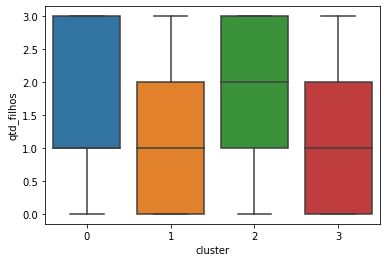

In [ ]:
sns.boxplot(data= base_completa, y = 'qtd_filhos', x='cluster')
plt.show()

#Pergunta 9:

---

Qual é a quantidade de solteiros e hipertensos estão presentes no cluster de identificador 3?

In [ ]:
base_completa.query('hipertenso == 1 & estado_civil == 0').groupby('cluster').count()

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,nome_produto,cod_classe_produto,classe_produto,valor,nome_estado,sgl_estado
cluster,,,,,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160
3,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28


#Pergunta 10

---
Qual é o número total de diabéticos para o cluster de identificador 0?



In [ ]:
base_completa.query('diabetes == 1 & cluster == 0').count()

cod_cliente           704
sexo                  704
idade                 704
qtd_filhos            704
estado_civil          704
cod_estado            704
hipertenso            704
diabetes              704
cod_produto           704
qtd_produto           704
valor_unitario        704
valor_total_compra    704
nome_produto          704
cod_classe_produto    704
classe_produto        704
valor                 704
nome_estado           704
sgl_estado            704
cluster               704
dtype: int64

#Parte 2 do desafio

#Carregando as Bases

In [ ]:
movies = pd.read_csv("movies.csv")

In [ ]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
ratings = pd.read_csv("ratings.csv")

#Pergunta 11

---
Quantos usuários distintos existem no dataset de ratings?



*   100836
*   610
*   182
*   326










In [ ]:
ratings.head(1)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703


In [ ]:
ratings.userId.count()

100836

# Pergunta 12:



---


Através algoritmo apriori gere os itens mais frequentes após a junção dos datasets. Utilize o parâmetro min_support=0.3 e responda: qual a é quantidade de itens frequentes foram criados?


In [ ]:
#Unificando as bases
avaliacao = pd.merge(movies, ratings, on = 'movieId')

In [ ]:
#Tratando dados
avaliacao.loc[avaliacao['rating']>0, 'visto'] = 1

In [ ]:
avaliacao.visto.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
100831    False
100832    False
100833    False
100834    False
100835    False
Name: visto, Length: 100836, dtype: bool

In [ ]:
#criando tabela pivot
tabela_pivot = avaliacao.pivot_table(
                               index='userId', 
                               columns='title',
                               values='visto',
                               fill_value=0
                               ).reset_index(drop=True)

In [ ]:
tabela_pivot

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:
frequent_itemsets =  apriori(tabela_pivot, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.300000,(Aladdin (1992))
1,0.334426,(American Beauty (1999))
2,0.329508,(Apollo 13 (1995))
3,0.309836,(Batman (1989))
4,0.388525,(Braveheart (1995))
5,0.357377,(Fight Club (1999))
6,0.539344,(Forrest Gump (1994))
7,0.311475,"(Fugitive, The (1993))"
8,0.314754,"(Godfather, The (1972))"
9,0.331148,(Independence Day (a.k.a. ID4) (1996))


In [ ]:
frequent_itemsets.count()

support     39
itemsets    39
dtype: int64

#Pergunta 13:

---

Qual o ID do usuário que mais assistiu filmes?


In [ ]:
ratings.groupby('userId').sum().sort_values(by = 'timestamp', ascending = False)

,movieId,rating,timestamp
userId,,,
599,63203766,6547.0,3729814054523
414,51982771,9151.5,2902006170460
474,15644511,7165.0,2280931580004
448,89272207,5307.5,2255053166496
610,64566481,4802.5,1939268752787
...,...,...,...
364,12636,88.0,18258314725
37,9377,87.0,17751403367
507,6712,71.0,17618257368


#Pergunta 14

---

Utilize o algoritmo association_rules, crie as regras de associação considerando, metric='confidence' e min_threshold=0.7 e responda: qual regra possui maior confiança?

In [ ]:
from mlxtend.frequent_patterns import association_rules

In [ ]:
regras = association_rules(frequent_itemsets, metric = 'confidence', min_threshold=0.7)
regras

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Braveheart (1995)),(Forrest Gump (1994)),0.388525,0.539344,0.300000,0.772152,1.431649,0.090451,2.021767
1,(Jurassic Park (1993)),(Forrest Gump (1994)),0.390164,0.539344,0.324590,0.831933,1.542489,0.114157,2.740902
2,(Pulp Fiction (1994)),(Forrest Gump (1994)),0.503279,0.539344,0.377049,0.749186,1.389068,0.105609,1.836640
3,"(Shawshank Redemption, The (1994))",(Forrest Gump (1994)),0.519672,0.539344,0.378689,0.728707,1.351097,0.098406,1.697998
4,(Forrest Gump (1994)),"(Shawshank Redemption, The (1994))",0.539344,0.519672,0.378689,0.702128,1.351097,0.098406,1.612529
5,"(Silence of the Lambs, The (1991))",(Forrest Gump (1994)),0.457377,0.539344,0.326230,0.713262,1.322461,0.079546,1.606537
6,(Star Wars: Episode IV - A New Hope (1977)),"(Matrix, The (1999))",0.411475,0.455738,0.300000,0.729084,1.599788,0.112475,2.008968
7,"(Shawshank Redemption, The (1994))",(Pulp Fiction (1994)),0.519672,0.503279,0.363934,0.700315,1.391506,0.102395,1.657481
8,(Pulp Fiction (1994)),"(Shawshank Redemption, The (1994))",0.503279,0.519672,0.363934,0.723127,1.391506,0.102395,1.734831
9,"(Silence of the Lambs, The (1991))",(Pulp Fiction (1994)),0.457377,0.503279,0.339344,0.741935,1.474204,0.109156,1.924795


In [ ]:
regras = regras[['antecedents','consequents', 'support','confidence','lift']]

In [ ]:
#renomeando as colunas
regras = regras.rename(columns={"antecedents": "se", "consequents": "então", 
                       "support": "suporte", 
                       "confidence": "confiança", "lift": "LIFT"})

In [ ]:
regras.sort_values(by='confiança', ascending=False)

,se,então,suporte,confiança,LIFT
11,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.311475,0.900474,2.188403
1,(Jurassic Park (1993)),(Forrest Gump (1994)),0.324590,0.831933,1.542489
0,(Braveheart (1995)),(Forrest Gump (1994)),0.300000,0.772152,1.431649
12,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode V - The Empire Strikes Bac...,0.311475,0.756972,2.188403
2,(Pulp Fiction (1994)),(Forrest Gump (1994)),0.377049,0.749186,1.389068
9,"(Silence of the Lambs, The (1991))",(Pulp Fiction (1994)),0.339344,0.741935,1.474204
6,(Star Wars: Episode IV - A New Hope (1977)),"(Matrix, The (1999))",0.300000,0.729084,1.599788
3,"(Shawshank Redemption, The (1994))",(Forrest Gump (1994)),0.378689,0.728707,1.351097
8,(Pulp Fiction (1994)),"(Shawshank Redemption, The (1994))",0.363934,0.723127,1.391506
5,"(Silence of the Lambs, The (1991))",(Forrest Gump (1994)),0.326230,0.713262,1.322461


#Pergunta 15

---

Qual o suporte da regra:

Se (Pulp Fiction (1994)) então (Forrest Gump (1994))?

In [ ]:
regras

,se,então,suporte,confiança,LIFT
0,(Braveheart (1995)),(Forrest Gump (1994)),0.300000,0.772152,1.431649
1,(Jurassic Park (1993)),(Forrest Gump (1994)),0.324590,0.831933,1.542489
2,(Pulp Fiction (1994)),(Forrest Gump (1994)),0.377049,0.749186,1.389068
3,"(Shawshank Redemption, The (1994))",(Forrest Gump (1994)),0.378689,0.728707,1.351097
4,(Forrest Gump (1994)),"(Shawshank Redemption, The (1994))",0.378689,0.702128,1.351097
5,"(Silence of the Lambs, The (1991))",(Forrest Gump (1994)),0.326230,0.713262,1.322461
6,(Star Wars: Episode IV - A New Hope (1977)),"(Matrix, The (1999))",0.300000,0.729084,1.599788
7,"(Shawshank Redemption, The (1994))",(Pulp Fiction (1994)),0.363934,0.700315,1.391506
8,(Pulp Fiction (1994)),"(Shawshank Redemption, The (1994))",0.363934,0.723127,1.391506
9,"(Silence of the Lambs, The (1991))",(Pulp Fiction (1994)),0.339344,0.741935,1.474204
